Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
features = pd.read_csv("wine.csv")
features.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Saperating the Clustered Column
data_y = features.iloc[:,:1]
data = features.iloc[:,1:]
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
#Scale the data
scaled_array = normalize(data)
scaled_array

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

In [7]:
#PCA implementation
pca = PCA(n_components=13)
fitted_pca = pca.fit_transform(scaled_array)
fitted_pca

array([[-3.74249996e-02,  8.56634034e-03, -7.02546064e-04, ...,
        -5.61513454e-05, -1.13946821e-04,  3.09751137e-05],
       [-6.12918310e-02,  6.26313138e-03, -1.59396531e-03, ...,
         5.22005415e-05, -1.01861989e-04,  2.66258795e-05],
       [-6.97808941e-02, -6.51972713e-04, -1.75026521e-03, ...,
         1.77939393e-04, -9.59052747e-05, -3.95480034e-05],
       ...,
       [-1.17017358e-02,  4.96269569e-03,  6.59786325e-03, ...,
        -1.68560874e-04,  3.12815264e-04,  7.34501556e-05],
       [-1.26364673e-02,  5.24455453e-03,  5.22725017e-03, ...,
        -1.23501575e-04,  1.12731400e-05,  1.73192668e-04],
       [ 2.02304567e-02, -8.87469952e-03,  8.47577684e-03, ...,
         1.10107583e-04, -1.33104172e-04,  4.96637789e-05]])

In [8]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[ 1.19673761e-01,  2.49338893e-02,  2.28717336e-02,
         2.33457695e-01,  9.47519104e-01,  2.00688799e-02,
         1.73009889e-02,  3.97611798e-03,  1.43830724e-02,
         2.40252869e-02,  9.84149647e-03,  2.57936287e-02,
        -1.73130819e-01],
       [-2.58199161e-01, -1.12804632e-01, -6.41661220e-02,
        -9.12659355e-01,  2.60494502e-01, -2.94612082e-02,
        -1.57073776e-02, -1.88344325e-02, -2.17734571e-02,
        -9.86958749e-02, -8.52837069e-03, -5.04888026e-02,
        -3.71524145e-02],
       [ 2.66019195e-02,  1.72076521e-01, -2.44664811e-03,
        -9.40350818e-02,  4.44798264e-02, -1.30209881e-01,
        -2.42092120e-01,  9.91768616e-03, -9.35210768e-02,
         8.77898280e-01, -7.74806881e-02, -2.45564272e-01,
         1.93485793e-01],
       [ 7.24459026e-01, -7.80376744e-03,  1.32563280e-02,
        -2.78520915e-01, -1.06968617e-01,  2.40448871e-01,
         2.89326875e-01, -3.49413143e-03,  1.42212745e-01,
         2.32895132e-01,  6.71130076e

In [9]:
# The amount of variance that each PCA has
var=pca.explained_variance_ratio_
var

array([9.77288307e-01, 1.34227214e-02, 4.52003698e-03, 1.61111671e-03,
       1.27350433e-03, 9.18427421e-04, 6.29847297e-04, 1.19411256e-04,
       8.89929288e-05, 6.48043129e-05, 3.15454807e-05, 2.26629171e-05,
       8.62198254e-06])

In [10]:
# Cummulative variance of each PCA
var1=np.cumsum(np.round(var,4)*100)
var1

array([97.73, 99.07, 99.52, 99.68, 99.81, 99.9 , 99.96, 99.97, 99.98,
       99.99, 99.99, 99.99, 99.99])

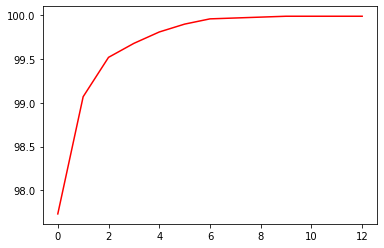

In [11]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='red')

In [12]:

# Final Dataframe(Considering three Principle Planes 99.52%)
final_df=pd.DataFrame(fitted_pca[:,0:3],columns=['PC1','PC2',"PC3"])
final_df

,PC1,PC2,PC3
0,-0.037425,0.008566,-0.000703
1,-0.061292,0.006263,-0.001594
2,-0.069781,-0.000652,-0.001750
3,-0.079461,0.001433,-0.001065
4,0.005421,0.005151,-0.000909
...,...,...,...
173,-0.024926,-0.003294,0.004729
174,-0.017195,-0.003465,0.003521
175,-0.011702,0.004963,0.006598
176,-0.012636,0.005245,0.005227


# 1. K-Means Clustering

In [13]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(final_df)
    wcss.append(kmeans.inertia_)

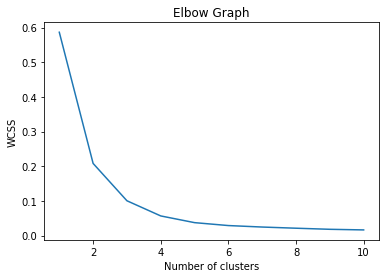

In [14]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Build Cluster algorithm using K=3

In [15]:
# Cluster algorithm using K=3
kmeans=KMeans(3,random_state=30).fit(final_df)
kmeans

KMeans(n_clusters=3, random_state=30)

In [16]:
data_y["KMeans"] = kmeans.labels_
data_y

,Type,KMeans
0,1,2
1,1,2
2,1,2
3,1,2
4,1,0
...,...,...
173,3,0
174,3,0
175,3,0
176,3,0


# 2. Hierarchical Clustering

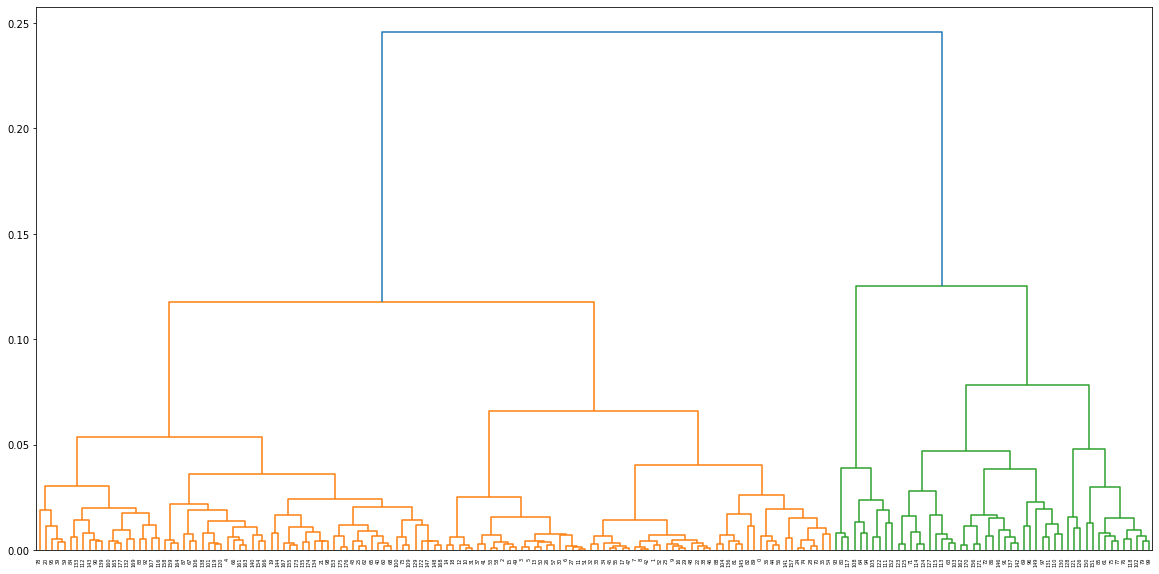

In [17]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(final_df,'complete'))


In [18]:
# Create Clusters
Hierarchical=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Hierarchical.fit_predict(final_df)

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [19]:
data_y["Hierarchical"] = Hierarchical.labels_
data_y.rename(mapper={"Type":"Original"},axis=1,inplace=True)
data_y

,Original,KMeans,Hierarchical
0,1,2,0
1,1,2,2
2,1,2,2
3,1,2,2
4,1,0,0
...,...,...,...
173,3,0,0
174,3,0,0
175,3,0,0
176,3,0,0


# Visualizing By considering two Principle Planes

C:\Users\AkashMY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


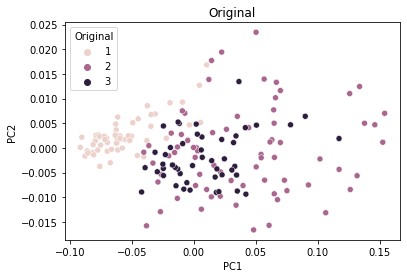

C:\Users\AkashMY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


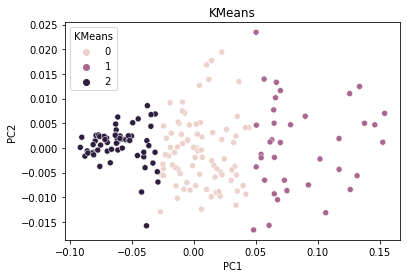

C:\Users\AkashMY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


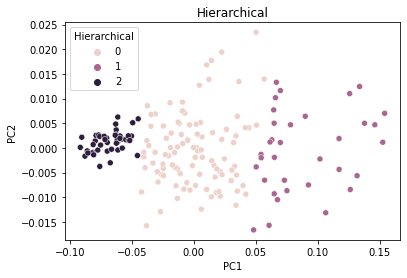

In [20]:
for i in range(3):
    plt.title(data_y.columns[i])
    sns.scatterplot(final_df["PC1"],final_df["PC2"],hue=data_y.iloc[:,i])
    plt.show()
    